# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\shshi\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


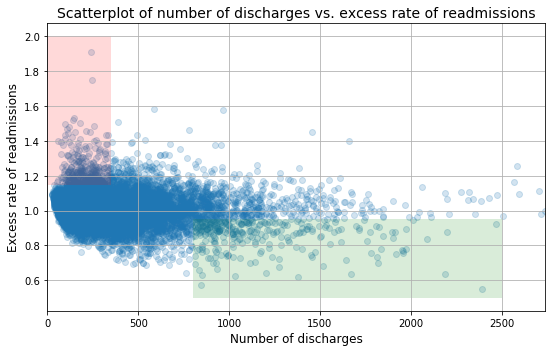

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [6]:
# Your turn

A. Do you agree with the above analysis and recommendations? Why or why not?

I think there are some room for improvement on the analysis.
on A, if we erase two data points that could be an outlier, the correlation between low discharge and excessive readmission greatly decreses.
We do not see if they performed any statistical analysis on their data therefore although this graph seem appealing as showing a certain correlation, it may have been generated by sheer chance.
Also, we do not see where they got the number 300 from when defining "small capacity" hospitals. In the statistical part they only talk about how hospitals with less than 100 discharge have more readmission rate.

B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

1. Setup an appropriate hypothesis test.

null hypothesis = there is no significant statistical correlation between readmission rate and number of discharge

In [11]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


2. Compute and report the observed significance value (or p-value).

In [18]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [22]:
r=pearson_r(x,y)
print(r)

-0.09309554287590442


In [24]:
len(y)

11494

from the r value we can calculate t statistics because our sample size is very large

In [34]:
t=r*np.sqrt((len(x)-2)/(1-r**2))
print('our t value is',t)

our t value is -10.02344167426359


In [32]:
import scipy.stats as stats 
p_t=stats.t.sf(-t,len(x)-2)*2
print('our p value is',p_t)

our p value is 1.5022756426614974e-23


Therefore, our data is negatively correlated and because p value is extremely small, it is unlikely that this was due to chance.

3. Report statistical significance for  α  = .01.

pearson r score is known to be not normally distributed. Therefore before we find confidence interval or error, we will transform this into Fisher Z'

In [46]:
import math
def fisher(r):
    FishZ=0.5*(math.log(1+r)-math.log(1-r))
    return FishZ
FishZ=fisher(r)

In [47]:
print(FishZ)

-0.09336589633052667


The sampling distribution of z' is normally distributed and has standard error of 1/root(sample-3)

In [54]:
std_error=1/np.sqrt(len(x)-3)

In [55]:
conf_int95=[FishZ-1.96*std_error, FishZ+1.96*std_error]

In [56]:
conf_int95

[-0.11165014667907688, -0.07508164598197645]

In [57]:
def ZtoR(z):
    r=(math.exp(2*z)-1)/(math.exp(2*z)+1)
    return r

In [58]:
conf_int_r95=[ZtoR(conf_int95[0]),ZtoR(conf_int95[1])]

In [59]:
print(conf_int_r95)

[-0.11118851391542828, -0.07494087863117276]


Therefore when 95%, the confidence interval is between -0.111 and -0.0749

In [60]:
conf_int99=[FishZ-2.576*std_error, FishZ+2.576*std_error]

In [61]:
conf_int99

[-0.11739662536004981, -0.06933516730100352]

In [62]:
conf_int_r99=[ZtoR(conf_int99[0]),ZtoR(conf_int99[1])]

In [63]:
print(conf_int_r99)

[-0.11686026318575046, -0.06922427404255768]


Therefore when 99%, the confidence interval is between -0.117 and -0.0692

4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Although the nagative correlation is significant in terms of statistics, the correlation is by 1% which may not be the most significiant in practical term. If you were to build a policy that cost a lot of money around it, I would probably advise them not to base their policy on this particular point and find something that show stronger correlations.

5. Look at the scatterplot above.
    
    What are the advantages and disadvantages of using this plot to convey information?
    Construct another plot that conveys the same information in a more direct manner.

I think the advantage of that plot was to show raw data, but due to some data being clustered together too closly it is not doing a very good job of conveying the correlation between the two data.
Adding a regression line will solve that problem.

In [70]:
new_df=pd.DataFrame({'Number of discharges':x,'Excess rate of readmissions':y})

C:\Users\shshi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


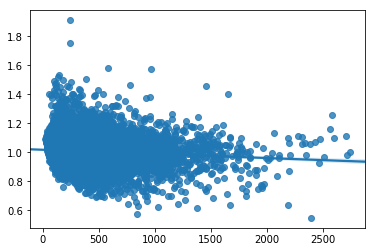

In [71]:
import seaborn as sns
sns.regplot(x,y,new_df,fit_reg=True)